# Prediction of Fraudulent transactions

**To develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan**

In [1]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. Data Reading and Understanding

In [3]:
# importing and reading the csv file
fraud_df = pd.read_csv("Fraud.csv")
fraud_df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
# dimensions of the data
fraud_df.shape

(6362620, 11)

In [5]:
# info of the data
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Here, **'isFraud' is the target variable**

In [6]:
# description of the data
fraud_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## 2. Data Cleaning

### 2.1. Remove/Impute missing values 

In [7]:
# Checking for null values
fraud_df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

This shows that there are **no missing data** in any of the columns.

### 2.2. Remove Duplicates

In [8]:
# Checking duplicates
fraud_df[fraud_df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


This shows that there are **no duplicates**.

### 2.3. Splitting Numerical and Categorical columns

In [9]:
# Categorical columns
cat_col = [i for i in fraud_df.drop('isFraud', axis=1).columns if fraud_df[i].dtypes == 'O']
cat_col

['type', 'nameOrig', 'nameDest']

In [10]:
# Numeric columns
num_col = [i for i in fraud_df.drop('isFraud', axis=1).columns if fraud_df[i].dtypes != 'O']
num_col

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFlaggedFraud']

In [11]:
# dropping columns
fraud_df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

The above mentioned columns have been dropped as they could not be useful in upcoming analysis

### 2.4. Remove Outliers

#### Checking outliers through Boxplot

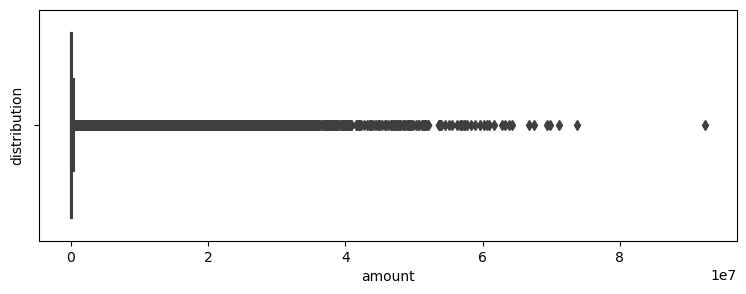

In [12]:
# Amount
plt.figure(figsize=[9,3])
sns.boxplot(x='amount', data=fraud_df)
plt.ylabel('distribution')
plt.show()

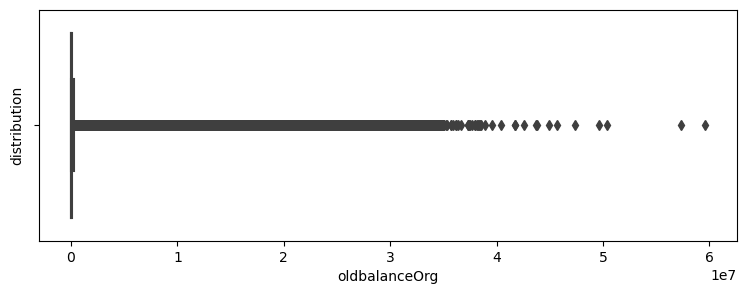

In [13]:
# oldbalanceOrg
plt.figure(figsize=[9,3])
sns.boxplot(x='oldbalanceOrg', data=fraud_df)
plt.ylabel('distribution')
plt.show()

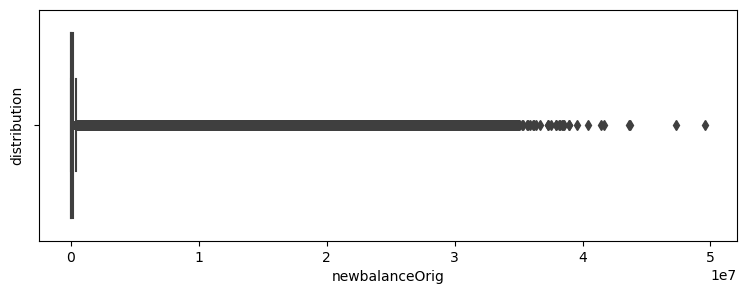

In [14]:
# newbalanceOrig
plt.figure(figsize=[9,3])
sns.boxplot(x='newbalanceOrig', data=fraud_df)
plt.ylabel('distribution')
plt.show()

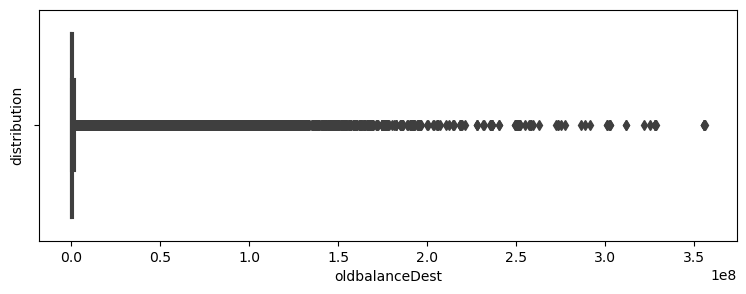

In [15]:
# oldbalanceDest
plt.figure(figsize=[9,3])
sns.boxplot(x='oldbalanceDest', data=fraud_df)
plt.ylabel('distribution')
plt.show()

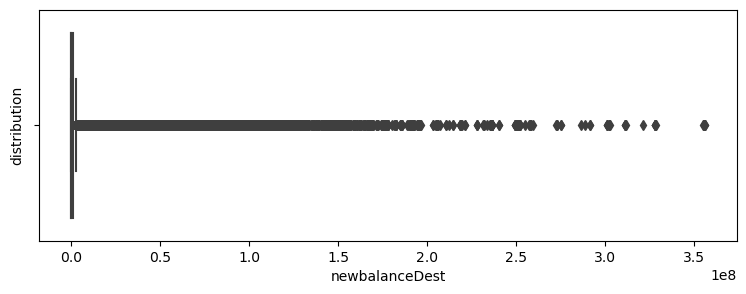

In [16]:
# newbalanceDest
plt.figure(figsize=[9,3])
sns.boxplot(x='newbalanceDest', data=fraud_df)
plt.ylabel('distribution')
plt.show()

#### Removing outliers

In [17]:
# creating function to remove outliers
def remove_outliers(df,col):
    lower_quantile = df[col].quantile(0.25)
    upper_quantile = df[col].quantile(0.75)
    IQR = upper_quantile - lower_quantile
    lower_whisker = lower_quantile - 1.5 * IQR
    upper_whisker = upper_quantile + 1.5 * IQR
    temp = df.loc[(df[col]>lower_whisker)&(df[col]<upper_whisker)]
    return temp[col]

In [18]:
# calling the function to remove outliers
fraud_df['amount'] = remove_outliers(fraud_df, 'amount')
fraud_df['oldbalanceOrg'] = remove_outliers(fraud_df, 'oldbalanceOrg')
fraud_df['newbalanceOrig'] = remove_outliers(fraud_df, 'newbalanceOrig')
fraud_df['oldbalanceDest'] = remove_outliers(fraud_df, 'oldbalanceDest')
fraud_df['newbalanceDest'] = remove_outliers(fraud_df, 'newbalanceDest')

##### The outliers have been removed.

## 3. Exploratory Data Analysis

### 3.1. Correlation of numeric data

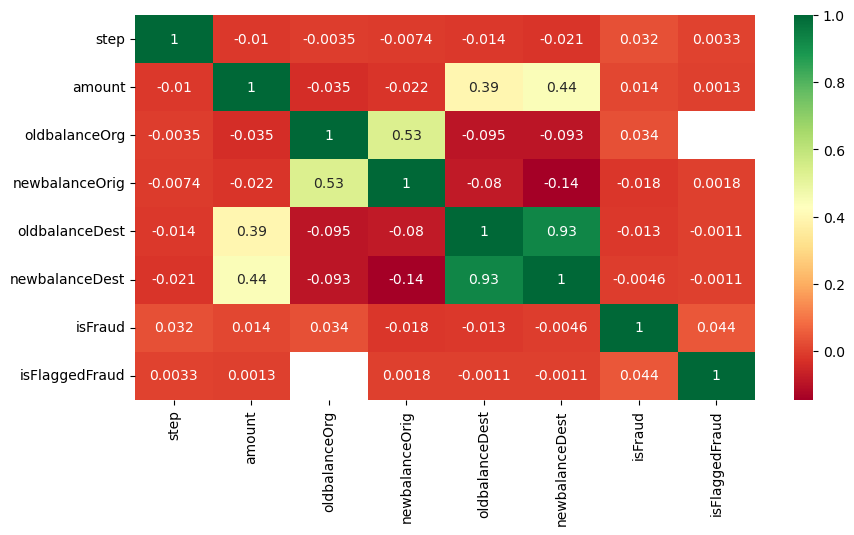

In [19]:
# checking for multicollinearity
plt.figure(figsize=[10,5])
sns.heatmap(fraud_df.corr(), annot=True, cmap='RdYlGn')
plt.show()

Aforementioned plot shows that the **old and new transactions** of both **sender's** and **reciepient's** are **highly correlated** with each other.

### 3.2. Univariate Analysis

#### Target variable 'isFraud'

0    6354407
1       8213
Name: isFraud, dtype: int64


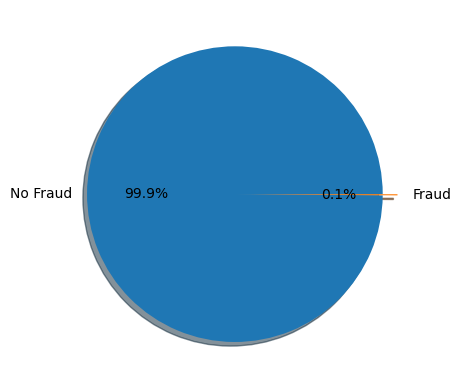

In [20]:
# value count
print(fraud_df.isFraud.value_counts())

# pie plot for the value count
plt.pie(fraud_df.isFraud.value_counts(),explode=[0.1, 0], 
        labels=['No Fraud', 'Fraud'], shadow=True, autopct='%1.1f%%')
plt.show()

Aforementioned plot shows a **high imbalance** in the dataset due to tiny ratio of frauds to non-frauds.

#### Type of payment

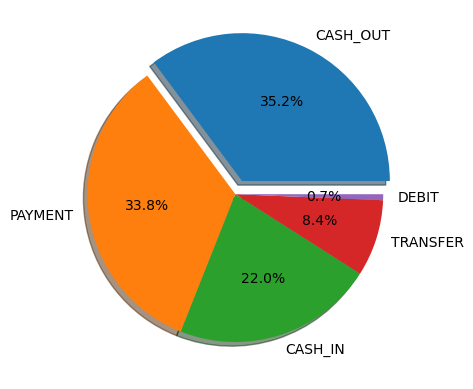

In [21]:
# pie plot for the value count of each category 
values = fraud_df['type'].value_counts().values
labels = fraud_df['type'].value_counts().keys()
explode = (0.1,0,0,0,0)

plt.pie(values, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%')
plt.show()

A vast majority of the transactions are of the type CASH_OUT having an overall proportion of a little more than one-third, closely followed by Payment mode having a share of nearly 34%. The proportion of CASH_IN transaction stood at just over one-fifth, even though, the percentage of debit and normal transfer transactions had a minimal share of less than one-tenth.

#### isFlaggedFraud

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64


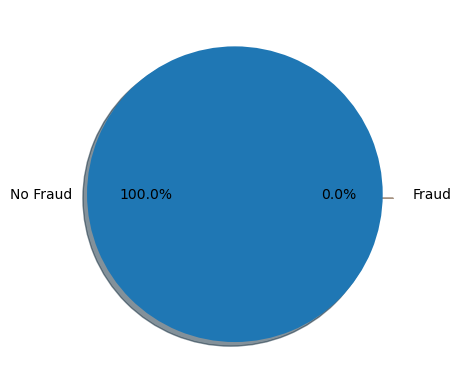

In [22]:
# value count
print(fraud_df.isFlaggedFraud.value_counts())

# pie plot for the value count
plt.pie(fraud_df.isFlaggedFraud.value_counts(),explode=[0.1, 0], 
        labels=['No Fraud', 'Fraud'], shadow=True, autopct='%1.1f%%')
plt.show()

#### Amount

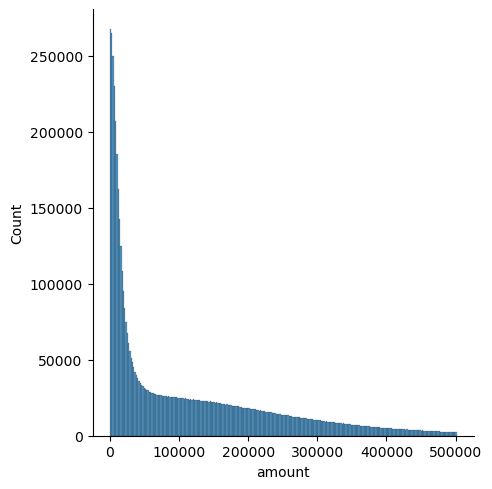

In [23]:
# distplot
sns.displot(data=fraud_df, x='amount')
plt.show()

All the balances, either old or new, of both the sender as well as the receiver have a positively right skewed distribution.

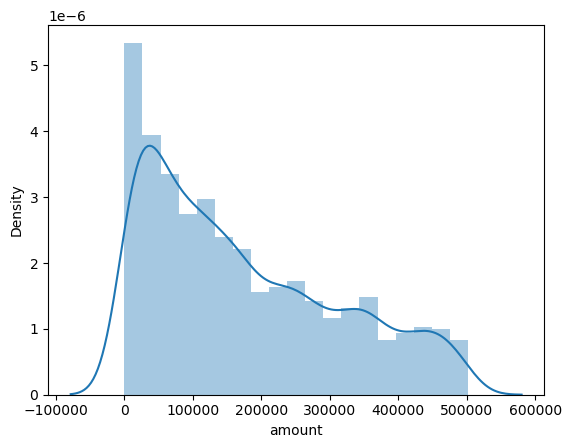

In [24]:
# distplot of amount of fraud cases 
positive_fraud_case = fraud_df[fraud_df.isFraud == 1]
sns.distplot(positive_fraud_case['amount'])
plt.show()

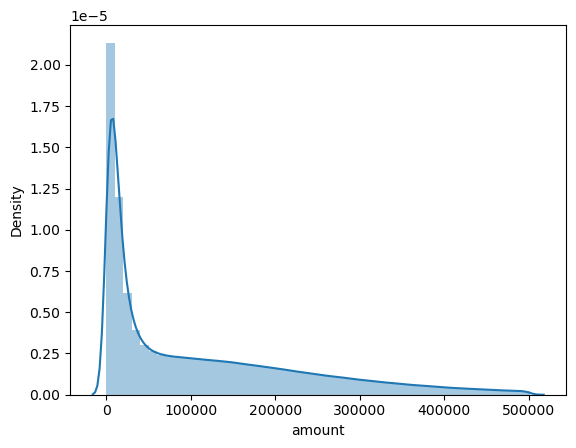

In [25]:
# distplot of amount of non-fraud cases 
non_fraud_case = fraud_df[fraud_df.isFraud == 0]
sns.distplot(non_fraud_case['amount'])
plt.show()

### 3.3. Bivariate Analysis

#### amount and payment types

In [26]:
# max amount for each type
max_amount_type = fraud_df.groupby('type')['amount'].max().sort_values(ascending=False).reset_index()[:10]
max_amount_type

,type,amount
0,CASH_OUT,501718.41
1,CASH_IN,501718.02
2,TRANSFER,501709.63
3,DEBIT,417825.07
4,PAYMENT,238637.98


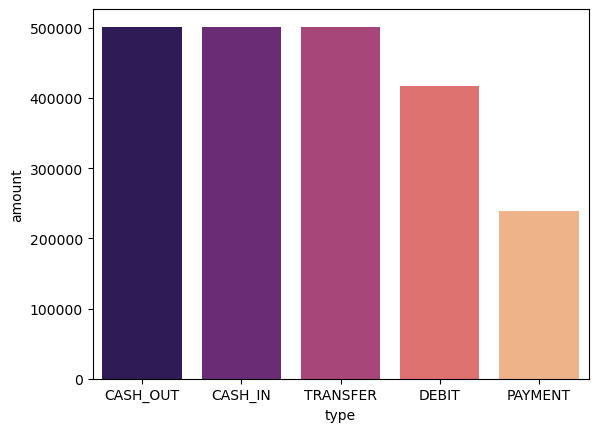

In [27]:
# barplot for max amount of each type of payment
sns.barplot(x='type', y='amount', data=max_amount_type, palette='magma')
plt.show()

#### oldbalanceDest and newbalanceDest

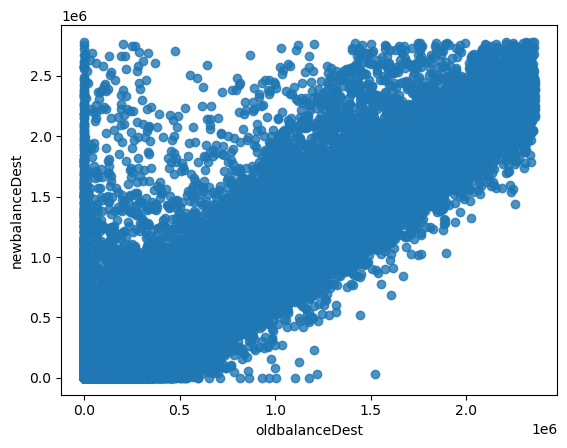

In [28]:
# regplot of relation b/w the old and new balance of the Recipient
sns.regplot(x='oldbalanceDest',y='newbalanceDest',data=fraud_df.sample(100000))
plt.show()

#### oldbalanceOrg and newbalanceOrig

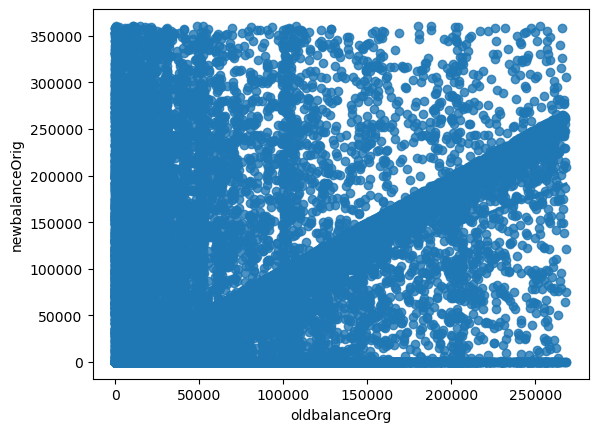

In [29]:
# regplot of relation b/w the old and new balance of the Sender
sns.regplot(x='oldbalanceOrg',y='newbalanceOrig',data=fraud_df.sample(100000))
plt.show()

## 4. Data Pre-Processing

### 4.1. Dummy variables

In [30]:
# Creating dummy variables
payment_types = pd.get_dummies(fraud_df.type, prefix='type', drop_first=True)
fraud_df = pd.concat([fraud_df,payment_types], axis=1)
fraud_df.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0,0,0,0,1,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0,0,0,0,1,0
2,1,TRANSFER,181.00,181.00,0.00,0.0,0.00,1,0,0,0,0,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1,0,1,0,0,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0,0,0,0,1,0
5,1,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,0,0,0,0,1,0
6,1,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,0,0,0,0,1,0
7,1,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,0,0,0,0,1,0
8,1,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,0,0,0,0,1,0
9,1,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,0,0,0,1,0,0


In [31]:
# dropping the type column
fraud_df.drop('type', axis=1, inplace=True)

In [32]:
# converting the datatypes of dummy variables into 'int64'
fraud_df['type_CASH_OUT'] = fraud_df['type_CASH_OUT'].astype(np.int64)
fraud_df['type_DEBIT'] = fraud_df['type_DEBIT'].astype(np.int64)
fraud_df['type_PAYMENT'] = fraud_df['type_PAYMENT'].astype(np.int64)
fraud_df['type_TRANSFER'] = fraud_df['type_TRANSFER'].astype(np.int64)

In [33]:
# checking the datatypes of the columns
fraud_df.dtypes

step                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
type_CASH_OUT       int64
type_DEBIT          int64
type_PAYMENT        int64
type_TRANSFER       int64
dtype: object

### 4.2. Splitting of data

In [34]:
# min-max normalization t
fraud_df['amount'].fillna(fraud_df['amount'].mean(),inplace=True)
fraud_df['oldbalanceOrg'].fillna(fraud_df['oldbalanceOrg'].mean(),inplace=True)
fraud_df['newbalanceOrig'].fillna(fraud_df['newbalanceOrig'].mean(),inplace=True)
fraud_df['oldbalanceDest'].fillna(fraud_df['oldbalanceDest'].mean(),inplace=True)
fraud_df['newbalanceDest'].fillna(fraud_df['newbalanceDest'].mean(),inplace=True)

In [35]:
# split data into X and y
X = fraud_df.drop('isFraud', axis=1)
y = fraud_df.isFraud

The **target variable(y)** is **predominantly imbalanced** which may hamper the predictive accuracy of the models as the predictions may be solely made on the basis of the 'majority class', thereby completely neglecting the 'minority class' as a consequence.

## 5. Model Training and Evaluation

### 5.1. Data modelling

In [36]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [37]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2000)
print('dimensions of training data: ',X_train.shape,'\n',
     'dimensions of testing data: ',X_test.shape)

dimensions of training data:  (4453834, 11) 
 dimensions of testing data:  (1908786, 11)


### Principal Component Analysis (PCA)

In [38]:
# apply pca to train data
pca = Pipeline([('scaler', MinMaxScaler()), ('pca', PCA())])

In [39]:
pca.fit(X_train)
train_pca = pca.fit_transform(X_train)

In [40]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explained variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      49.02
1      67.95
2      75.98
3      82.93
4      87.62
5      92.22
6      96.21
7      98.27
8      99.23
9     100.00
10    100.00
dtype: float64


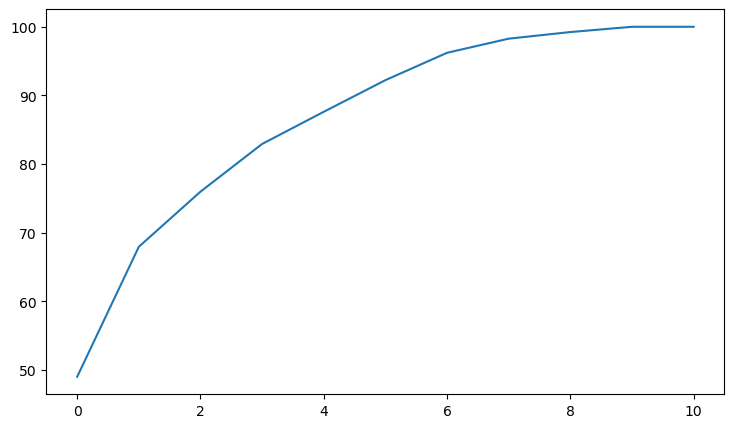

In [41]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)
plt.show()

### PCA and Logistic Regression

In [42]:
# create pipeline
PCA_VARS = 6
steps = [('scaler', MinMaxScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [43]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.810287945172631

### Evaluate on test data

In [45]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[1544958  361404]
 [    238    2186]]
Sensitivity: 	0.9
Specificity: 	0.81
AUC:    	 0.94


### Hyperparameter tuning - PCA and Logistic Regression

In [46]:
# class imbalance
y_train.value_counts(normalize=True)

0    0.9987
1    0.0013
Name: isFraud, dtype: float64

In [47]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", MinMaxScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [6, 8], 'logistic__C': [0.01, 0.1, 1 , 10, 100, 1000, 10000], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2000)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [48]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2000, shuffle=True),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [6, 8]},
             scoring='roc_auc', verbose=1)

In [49]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,44.434667,1.654595,0.000000,0.000000,0.01,l1,6,"{'logistic__C': 0.01, 'logistic__penalty': 'l1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
1,41.851164,0.488837,0.000000,0.000000,0.01,l1,8,"{'logistic__C': 0.01, 'logistic__penalty': 'l1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
2,45.776570,4.496426,1.346841,0.333941,0.01,l2,6,"{'logistic__C': 0.01, 'logistic__penalty': 'l2...",0.911018,0.910724,0.910559,0.914219,0.904439,0.910192,0.003175,14
3,43.232543,1.464267,1.399812,0.165400,0.01,l2,8,"{'logistic__C': 0.01, 'logistic__penalty': 'l2...",0.916676,0.916899,0.916666,0.919727,0.910744,0.916142,0.002937,13
4,29.294516,6.395520,0.000000,0.000000,0.1,l1,6,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
5,31.691478,2.218785,0.000000,0.000000,0.1,l1,8,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
6,36.886323,4.561997,1.230016,0.205819,0.1,l2,6,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.919103,0.919327,0.918501,0.921595,0.913677,0.918441,0.002603,12
7,44.903735,6.647881,1.696237,0.136997,0.1,l2,8,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.924844,0.925954,0.924580,0.927578,0.919830,0.924557,0.002589,11
8,19.509821,1.340210,0.000000,0.000000,1,l1,6,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
9,27.549418,3.229053,0.000000,0.000000,1,l1,8,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,15


In [50]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9329855495524336
Best hyperparameters:  {'logistic__C': 10000, 'logistic__penalty': 'l2', 'pca__n_components': 6}


In [51]:
# predict fraud on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[1905644     718]
 [   2234     190]]
Sensitivity: 	0.08
Specificity: 	1.0
AUC:    	 0.93


## Answering the Questions

**1. Data cleaning including missing values, outliers and multi-collinearity.**

- There were no missing values found during Data Cleaning. 
- The outliers were being removed.
- The multicollinearity has been dealt with using PCA.

**2. Describe your fraud detection model in elaboration.**

 - The model of Logistic Regression has been used.
 - It has been implemented along with PCA.
 - Hyperparameter tuning has also been performed via GridCV and KFold techniques.
 - After that it has been tested using some metrics.
   
**3. How did you select variables to be included in the model?**
 
 - Some variables of object datatype have been dropped as could not be used during analysis or model building.
 - During dummy variable creation, original column has been dropped.
 - The rest have been left to selection via PCA.
 
**4. Demonstrate the performance of the model by using best set of tools.**

 - The performance metrics used are Confusion matrix, Sensitivity, Specificity, ROC score(AUC) 

**5. What are the key factors that predict fraudulent customer?**
 
 - The amount and transactions b/w the sender and recipient.  

**6. Do these factors make sense? If yes, How? If not, How not?**
 
 - The above mentioned factors do make sense as without them, no calculation can be made to predict the fraud.

**7. What kind of prevention should be adopted while company update its infrastructure?**

 - Keep your systems updated. 
 - Use antivirus and malware protection. 
 - Beware of internal fraud. 
 - Use OFAC checks.

**8. Assuming these actions have been implemented, how would you determine if they work?**

 - Proper Documentations and Digital rcords must be kept and shoud be updated.
 - Most Important strategy for preventing fraud is to closely monitor financial transactions.     
 - This includes regularly reviewing bank statements, credit card transactions, and other financial records for unusual    activity, patterns, or transactions.